<a href="https://colab.research.google.com/github/nevalenaginda/identifikasi-penyakit-buah-kakao/blob/master/Identifikasi_Penyakit_Pada_Buah_Kakao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#mengimport framework tensorflow dan mengecek versi
import tensorflow
tensorflow.__version__

'2.3.0'

In [3]:
#mengecek apakah gpu tersedia
tensorflow.test.gpu_device_name()

'/device:GPU:0'

In [5]:
#menghubungkan google collab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#masuk ke direktori kerja di google drive
%cd drive/My Drive/Skripsi/Dataset Kakao Resize

/content/drive/My Drive/Skripsi/Dataset Kakao Resize


In [7]:
#menampilkan folder pada direktori kerja
!ls

'Anoreksa Buah Kakao'	 'Busuk Buah Kakao'	       'Penggerek Buah Kakao'
'Antraknose Buah Kakao'  'Kepik Penghisap Buah Kakao'  'Sehat Buah Kakao'


In [48]:
#mengimpor library dan framework yang diperlukan
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [24]:
#menginisialisasi folder dataset
folder_data = ['Anoreksa Buah Kakao', 'Antraknose Buah Kakao', 'Busuk Buah Kakao', 'Kepik Penghisap Buah Kakao', 'Penggerek Buah Kakao', 'Sehat Buah Kakao']

#memuat alamat gambar pada folder dataset ke variabel fnames
fnames = []
for folder in folder_data:
    file_names = os.listdir(folder)
    full_path = [os.path.join(folder, file_name) for file_name in file_names]
    fnames.append(full_path)

In [26]:
print('Jumlah alamat gambar setiap folder data:', [len(f) for f in fnames])

Jumlah alamat gambar setiap folder data: [59, 53, 66, 56, 61, 57]


In [28]:
#memuat setiap gambar dari alamat gambar (fnames) ke variabel images
images = []
for names in fnames:
    one_category_images = [cv2.imread(name) for name in names if (cv2.imread(name)) is not None]
    images.append(one_category_images)
print('Jumlah gambar setiap folder data:', [len(f) for f in images])

Jumlah gambar setiap folder data: [59, 53, 66, 56, 61, 57]


In [31]:
#melihat ukuran gambar minimal dan maksimal gambar pada masing-masing folder data
for i,imgs in enumerate(images):
    shapes = [img.shape for img in imgs]
    widths = [shape[0] for shape in shapes]
    heights = [shape[1] for shape in shapes]
    print('%d,%d adalah ukuran gambar minimum untuk %s' % (np.min(widths), np.min(heights), folder_data[i]))
    print('%d,%d adalah ukuran gambar maksimum untuk %s \n' % (np.max(widths), np.max(heights), folder_data[i]))

1177,1309 adalah ukuran gambar minimum untuk Anoreksa Buah Kakao
3385,2585 adalah ukuran gambar maksimum untuk Anoreksa Buah Kakao 

1177,1001 adalah ukuran gambar minimum untuk Antraknose Buah Kakao
4608,2128 adalah ukuran gambar maksimum untuk Antraknose Buah Kakao 

1465,993 adalah ukuran gambar minimum untuk Busuk Buah Kakao
3193,2001 adalah ukuran gambar maksimum untuk Busuk Buah Kakao 

1745,857 adalah ukuran gambar minimum untuk Kepik Penghisap Buah Kakao
4033,2441 adalah ukuran gambar maksimum untuk Kepik Penghisap Buah Kakao 

1361,897 adalah ukuran gambar minimum untuk Penggerek Buah Kakao
2889,2103 adalah ukuran gambar maksimum untuk Penggerek Buah Kakao 

821,559 adalah ukuran gambar minimum untuk Sehat Buah Kakao
2873,2103 adalah ukuran gambar maksimum untuk Sehat Buah Kakao 



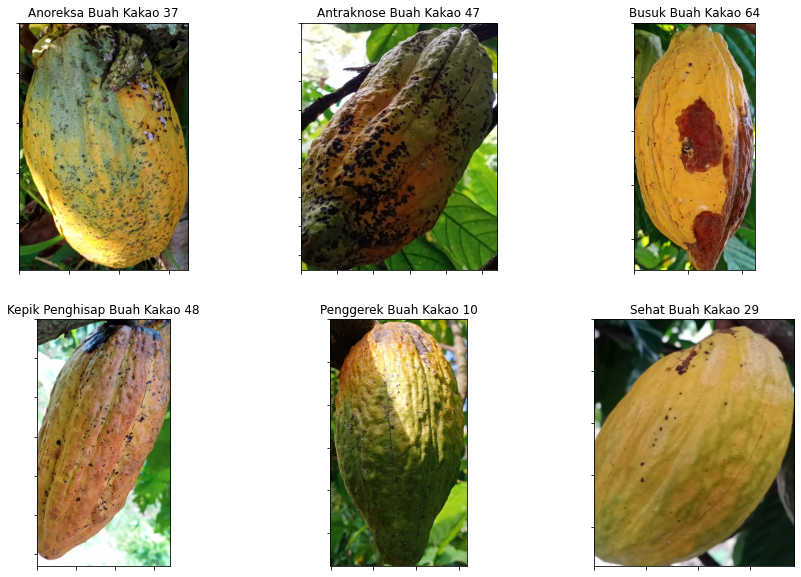

In [36]:
#membuat fungsi untuk merubah citra bgr hasil pembacaan opencv ke citra rgb untuk ditampilkan menggunkan matplotlib
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

#menampilkan sebuah gambar dari masing-masing folder data
plt.figure(figsize=(15,10))
for i, imgs in enumerate(images):
    ax = plt.subplot(2,3,i+1)
    idx = np.random.randint(len(imgs))
    plt.imshow(cvtRGB(imgs[idx]))
    plt.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(folder_data[i]+' '+str(idx))
plt.show()

In [38]:
#mengubah ukuran gambar ke ukuran 224 x 224
img_width = 224
img_height = 224
resized_images = []
for i,imgs in enumerate(images):
    resized_images.append([cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC) for img in imgs])

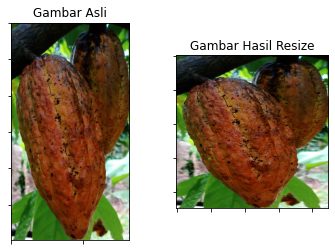

In [47]:
#menampilkan salah satu hasil perubahan ukuran gambar
img = images[3][30]
#print(img.shape)

resized_img = cv2.resize(img,(img_width, img_height), interpolation = cv2.INTER_CUBIC)
#print(resized_img.shape)

#gambar awal
ax1 = plt.subplot(1,2,1)
plt.grid(False)
plt.imshow(cvtRGB(img))
plt.title('Gambar Asli')
ax1.set_yticklabels([])
ax1.set_xticklabels([])

#gambar setelah diubah ukuran
ax2 = plt.subplot(1,2,2)
plt.title('Gambar Hasil Resize')
plt.grid(False)
plt.imshow(cvtRGB(resized_img))
ax2.set_yticklabels([])
ax2.set_xticklabels([])
plt.show()

In [58]:
#membagi data menjadi 70% data latih, 20% data validasi dan 10% data test
train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

train_images = []
val_images = []
test_images = []
for imgs in resized_images:
    train, val_test = train_test_split(imgs, test_size = 1-train_ratio)
    val, test = train_test_split(val_test, test_size = test_ratio/(test_ratio + validation_ratio))
    train_images.append(train)
    val_images.append(val)
    test_images.append(test)


In [59]:
#membuat label data
len_train_images = [len(imgs) for imgs in train_images]
print(len_train_images)
print('Jumlah data latih:', np.sum(len_train_images))
train_categories = np.zeros((np.sum(len_train_images)), dtype='uint8')
for i in range(6):
    if i is 0:
        train_categories[:len_train_images[i]] = i
    else:
        train_categories[np.sum(len_train_images[:i]):np.sum(len_train_images[:i+1])] = i
        
len_val_images = [len(imgs) for imgs in val_images]
print(len_val_images)
print('Jumlah data validasi', np.sum(len_val_images))
val_categories = np.zeros((np.sum(len_val_images)), dtype='uint8')
for i in range(6):
    if i is 0:
        val_categories[:len_val_images[i]] = i
    else:
        val_categories[np.sum(len_val_images[:i]):np.sum(len_val_images[:i+1])] = i

len_test_images = [len(imgs) for imgs in test_images]
print(len_test_images)
print('Jumlah data validasi', np.sum(len_test_images))
test_categories = np.zeros((np.sum(len_test_images)), dtype='uint8')
for i in range(6):
    if i is 0:
        test_categories[:len_test_images[i]] = i
    else:
        test_categories[np.sum(len_test_images[:i]):np.sum(len_test_images[:i+1])] = i

[35, 31, 39, 33, 36, 34]
Jumlah data latih: 208
[12, 11, 13, 11, 12, 11]
Jumlah data validasi 70
[12, 11, 14, 12, 13, 12]
Jumlah data validasi 74
